In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Read the sample data
data = pd.read_csv('sample_data.csv')
Fs = 125  # Sampling rate
data['time'] = np.arange(0, len(data)/Fs, 1.0/Fs)  # Create a time vector
# Compute the L2 norm of the IMU data
data['IMU norm'] = np.linalg.norm(data[['IMU x-axis', 'IMU y-axis', 'IMU z-axis']].values, axis = 1)
print(data.head())

         EEG  IMU x-axis  IMU y-axis  IMU z-axis   time  IMU norm
0  13.790465    0.229688    9.570312    1.225000  0.000  9.651128
1  37.016339    0.275862    9.585942    1.290666  0.008  9.676373
2  24.686933    0.275918    9.607017    1.229194  0.016  9.689263
3  33.215409    0.261061    9.602828    1.159392  0.024  9.676087
4  33.940073    0.257644    9.579602    1.164047  0.032  9.653505


Text(0.5, 0, 'time (s)')

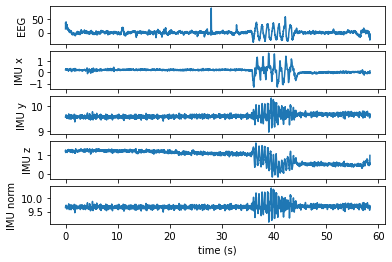

In [26]:
# plot the data
fig, ax = plt.subplots(5)
ax[0].plot(data['time'], data['EEG'])
ax[0].set_ylabel('EEG')
ax[1].plot(data['time'], data['IMU x-axis'])
ax[1].set_ylabel('IMU x')
ax[2].plot(data['time'], data['IMU y-axis'])
ax[2].set_ylabel('IMU y')
ax[3].plot(data['time'], data['IMU z-axis'])
ax[3].set_ylabel('IMU z')
ax[4].plot(data['time'], data['IMU norm'])
ax[4].set_ylabel('IMU norm')
ax[4].set_xlabel('time (s)')

In [27]:
# A function to perform NLMS algorithm: noisy_data: EEG data; reference: IMU data; p: length of the filter
def nlms(noisy_data, reference, p, mu):
    W = np.ones(p) # Initialize the filter to all ones
    x = np.zeros(p) # Initialize the reference buffer
    clean_data = np.zeros(len(noisy_data)) # Initialize the filtered signal
    for i in range(len(noisy_data)):
        x = np.roll(x, 1)
        x[0] = reference[i]
        clean_data[i] = noisy_data[i] - W.dot(x)
        W = W + mu*x*clean_data[i]/(1e-15 + x.dot(x))
    return clean_data

In [28]:
filter_length = 63 # length of the NLMS filter
step_size = 0.1 # step to update the weights of the NLMS filter
data['EEG clean'] = nlms(data['EEG'], data['IMU norm'], filter_length, step_size)

Text(0.5, 0, 'time (s)')

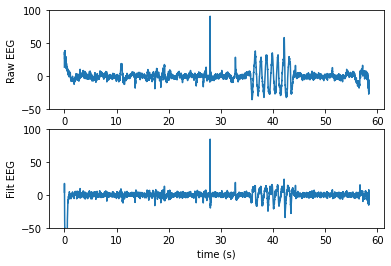

In [29]:
# plot the raw and filtered signal
fig, ax = plt.subplots(2)
ax[0].plot(data['time'], data['EEG'])
ax[0].set_ylabel('Raw EEG')
ax[0].set_ylim((-50, 100))
ax[1].plot(data['time'], data['EEG clean'])
ax[1].set_ylabel('Filt EEG')
ax[1].set_ylim((-50, 100))
ax[1].set_xlabel('time (s)')